# 1. Instalacja oraz konfiguracja podstawowych paczek

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached tensorflow_gpu-2.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached opencv_python-4.7.0.68-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached grpcio-1.51.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tensorflow_io_gcs_filesystem-0.29.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 2.8

In [5]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.3.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.12.7
charset-normalizer           2.1.1
comm                         0.1.2
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.4
decorator                    5.1.1
entrypoints                  0.4
executing                    1.2.0
flatbuffers                  22.12.6
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.15.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.7.0
idna                         3.4
importlib-metadata           6.0.0
ipykernel                    6.19.4
ipython                      8.7.0
jedi   

In [7]:
import tensorflow as tf
import os

In [8]:
# Poniższy kod zapobiega  przydzielaniu przez tensorflow całości pamięci GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Weryfikacja, kontrola oraz usunięcie z badania uszkodzonych, wadliwych zdjęć

In [11]:
import cv2
import imghdr

In [12]:
data_dir = 'data'

In [13]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) #sprawdzam czy mogę załadować zdjęcie do biblioteki opencv
            tip = imghdr.what(image_path) #sprwadzam czy rozsrzeszenie zdjęcia pokrywa się z akceptowalnymi rozszerzeniami
            if tip not in image_exts:
                print('Zdjęcie posiada nieobsługiwane rozszerzenie {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Wystąpił problem ze zdjęciem {}'.format(image_path))

# 3. Ładowanie danych

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data') #wywołanie zwróci zestaw danych z wskazanego katalogu, ujednolici, zmniejszy zdjęcia

Found 404 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator() #konwersja elementów zestawów danych na iterator, pozwoli nam uzyskać dostęp do poszczególnych danych

In [19]:
batch = data_iterator.next() #dostęp do zestawu danych, pobranie pierwszej iteracji

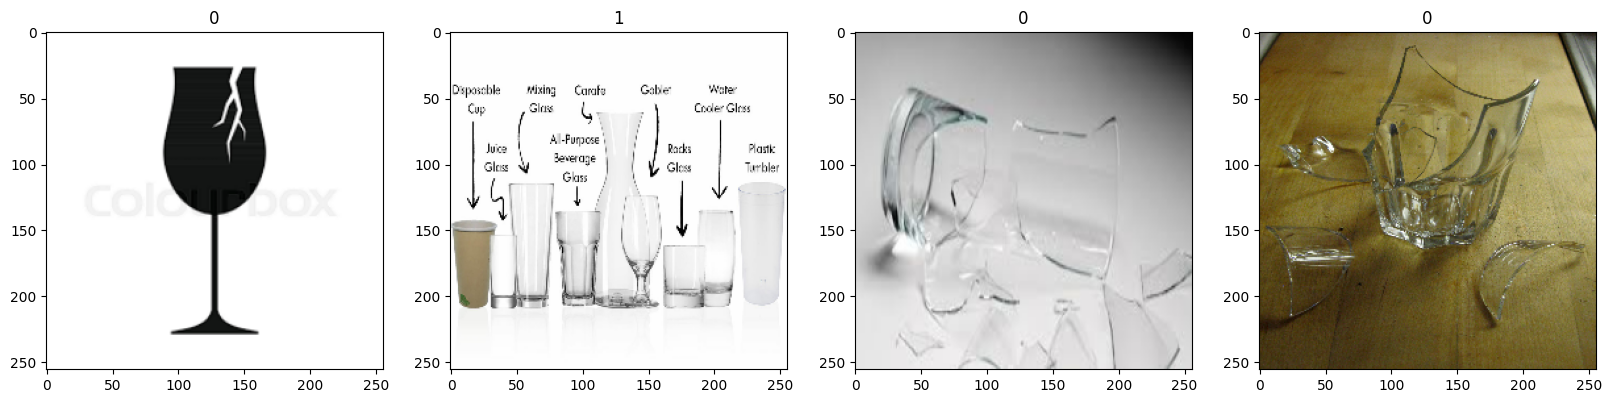

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Wstępne przetwarzanie danych

In [21]:
# przeskalowanie danych, w celu optymalizacji
data = data.map(lambda x,y: (x/255, y)) # funkcja .map umożliwia operacje na całym zestawie danych
data.as_numpy_iterator().next()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


(array([[[[5.4437041e-01, 4.4284621e-01, 2.5054380e-01],
          [5.2068782e-01, 4.3092832e-01, 2.3615962e-01],
          [4.7071078e-01, 3.8734680e-01, 2.0230545e-01],
          ...,
          [7.9708946e-01, 6.0101104e-01, 5.7064950e-01],
          [8.0000001e-01, 6.0392159e-01, 5.7647061e-01],
          [8.0000001e-01, 6.0392159e-01, 5.7647061e-01]],
 
         [[5.3805429e-01, 4.3644679e-01, 2.4431096e-01],
          [5.2692509e-01, 4.3517122e-01, 2.4389152e-01],
          [4.9340680e-01, 4.1004282e-01, 2.2134592e-01],
          ...,
          [7.9708946e-01, 6.0101104e-01, 5.7064950e-01],
          [8.0000001e-01, 6.0392159e-01, 5.7647061e-01],
          [8.0216086e-01, 6.0608244e-01, 5.7863146e-01]],
 
         [[5.2353430e-01, 4.2403287e-01, 2.3310566e-01],
          [5.3146386e-01, 4.3821937e-01, 2.4954750e-01],
          [5.2013230e-01, 4.3676835e-01, 2.4533914e-01],
          ...,
          [7.9821539e-01, 6.0213697e-01, 5.7177544e-01],
          [8.0112594e-01, 6.0504746e-

In [22]:
train_size = int(len(data)*.7) # część zestawu danych, która będzie odpowiedzalna za trenowanie modelu
val_size = int(len(data)*.2)+1 # część zestwu danych odpowiedzialna za walidacje
test_size = int(len(data)*.1)+1 # część zestawu danych odpowiedzialna za końcowe testy

In [23]:
train_size

9

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Budowa modelu głębokiego uczenia

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 6. Trenowanie

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-01-03 19:46:29.616832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-01-03 19:46:30.461335: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-03 19:46:30.743496: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f99540041b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-03 19:46:30.743510: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2023-01-03 19:46:30.745762: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-03 19:46:30.804808: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime 

9/9 [==============================] - 4s 101ms/step - loss: 0.6984 - accuracy: 0.5660 - val_loss: 0.6222 - val_accuracy: 0.6875
Epoch 2/20
9/9 [==============================] - 1s 103ms/step - loss: 0.5587 - accuracy: 0.6979 - val_loss: 0.9299 - val_accuracy: 0.4688
Epoch 3/20
9/9 [==============================] - 1s 103ms/step - loss: 0.5706 - accuracy: 0.7014 - val_loss: 0.4941 - val_accuracy: 0.7083
Epoch 4/20
9/9 [==============================] - 1s 102ms/step - loss: 0.4839 - accuracy: 0.7431 - val_loss: 0.3929 - val_accuracy: 0.8021
Epoch 5/20
9/9 [==============================] - 1s 100ms/step - loss: 0.3684 - accuracy: 0.8368 - val_loss: 0.5688 - val_accuracy: 0.6562
Epoch 6/20
9/9 [==============================] - 1s 101ms/step - loss: 0.4080 - accuracy: 0.7986 - val_loss: 0.2912 - val_accuracy: 0.8542
Epoch 7/20
9/9 [==============================] - 1s 110ms/step - loss: 0.2749 - accuracy: 0.8681 - val_loss: 0.2794 - val_accuracy: 0.8646
Epoch 8/20
9/9 [===============

In [33]:
# 7. Badanie wydajności, wykaz strat

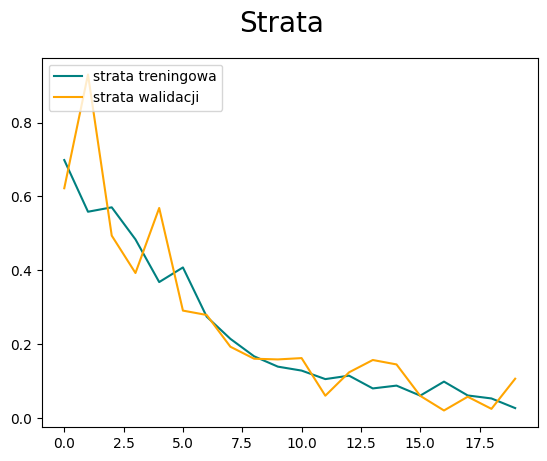

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='strata treningowa')
plt.plot(hist.history['val_loss'], color='orange', label='strata walidacji')
fig.suptitle('Strata', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
# 8. Badanie wydajności, wykaz dokładności

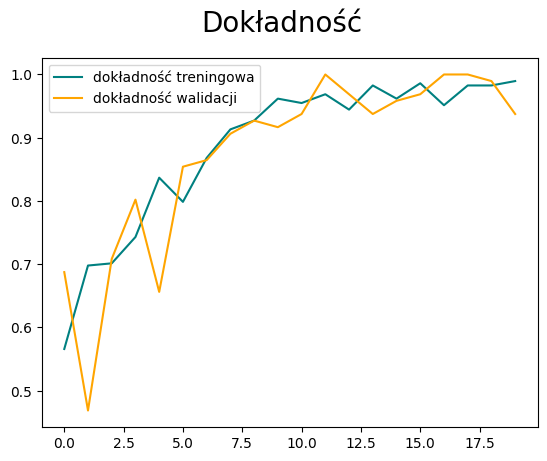

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='dokładność treningowa')
plt.plot(hist.history['val_accuracy'], color='orange', label='dokładność walidacji')
fig.suptitle('Dokładność', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
# 9. Ocena wydajności modelu

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


In [40]:
# 10. Test

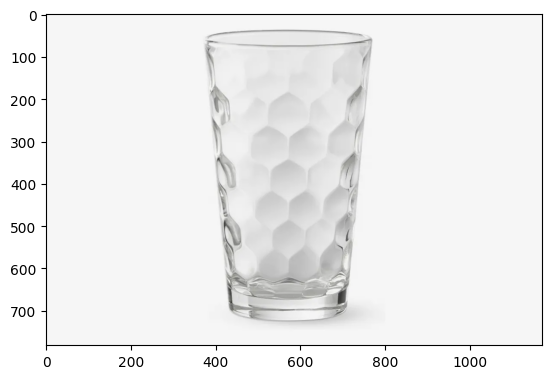

In [41]:
img = cv2.imread('success.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

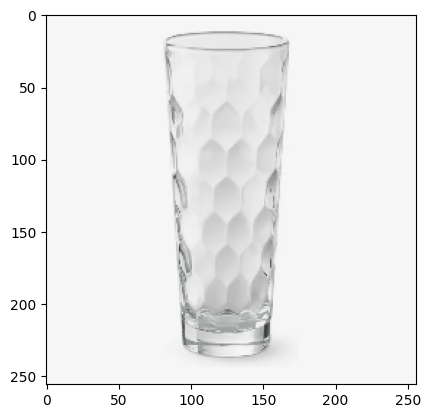

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat  = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 65ms/step


In [40]:
yhat

array([[0.99953854]], dtype=float32)

In [41]:
if yhat > 0.5:
    print(f'Wskazany obraz został sklasyfikowany jako część prawidłowa')
else:
    print(f'Wskazany obraz został sklasyfikowany jako część uszkodzona')

Wskazany obraz został sklasyfikowany jako część prawidłowa


In [42]:
# 9. Zapis modelu

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models', 'imageclassicationversionlive.h5'))

In [45]:
new_model = load_model(os.path.join('models', 'imageclassicationversionlive.h5'))

In [46]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [47]:
if yhat > 0.5:
    print(f'Wskazany obraz został sklasyfikowany jako część prawidłowa')
else:
    print(f'Wskazany obraz został sklasyfikowany jako część uszkodzona')

Wskazany obraz został sklasyfikowany jako część prawidłowa
